In [27]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# libraries for tuning hyperparameters
from sklearn.model_selection import GridSearchCV , KFold
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

# avoid errors
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### 1.EDA

In [5]:
df.shape

(15039, 11)

In [6]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


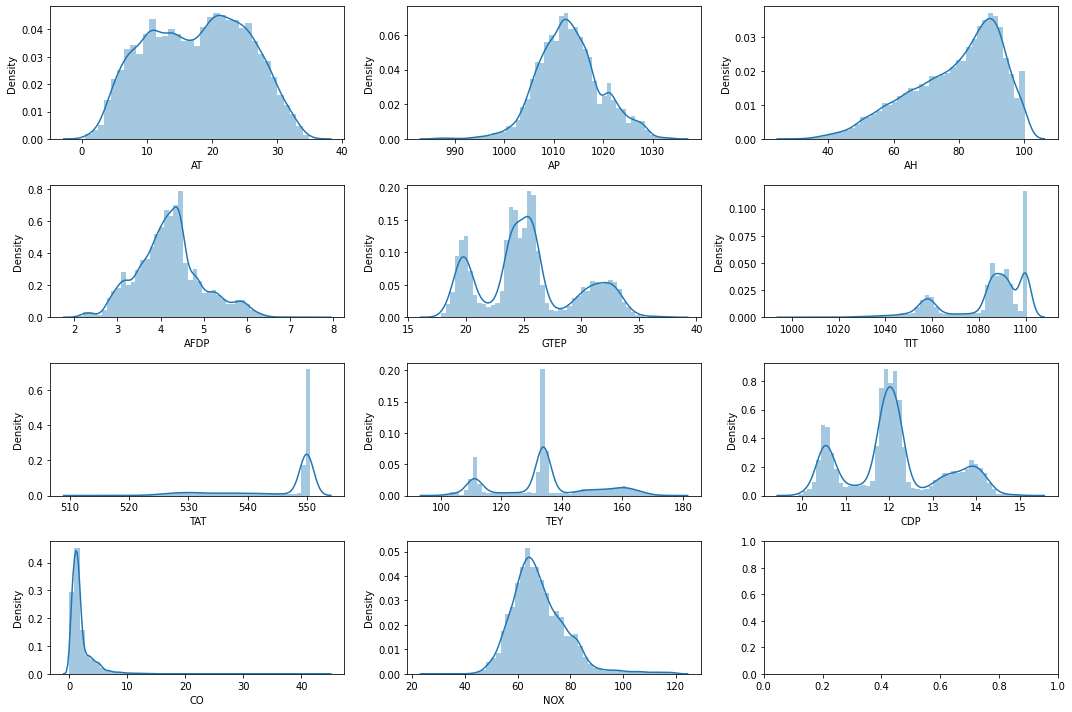

In [9]:
# Check the distribution

fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0])
sns.distplot(data.AP, ax = ax[0,1])
sns.distplot(data.AH, ax = ax[0,2])
sns.distplot(data.AFDP, ax = ax[1,0])
sns.distplot(data.GTEP, ax = ax[1,1])
sns.distplot(data.TIT, ax = ax[1,2])
sns.distplot(data.TAT, ax = ax[2,0])
sns.distplot(data.TEY, ax = ax[2,1])
sns.distplot(data.CDP, ax = ax[2,2])
sns.distplot(data.CO, ax = ax[3,0])
sns.distplot(data.NOX, ax = ax[3,1])

plt.tight_layout()
plt.show()

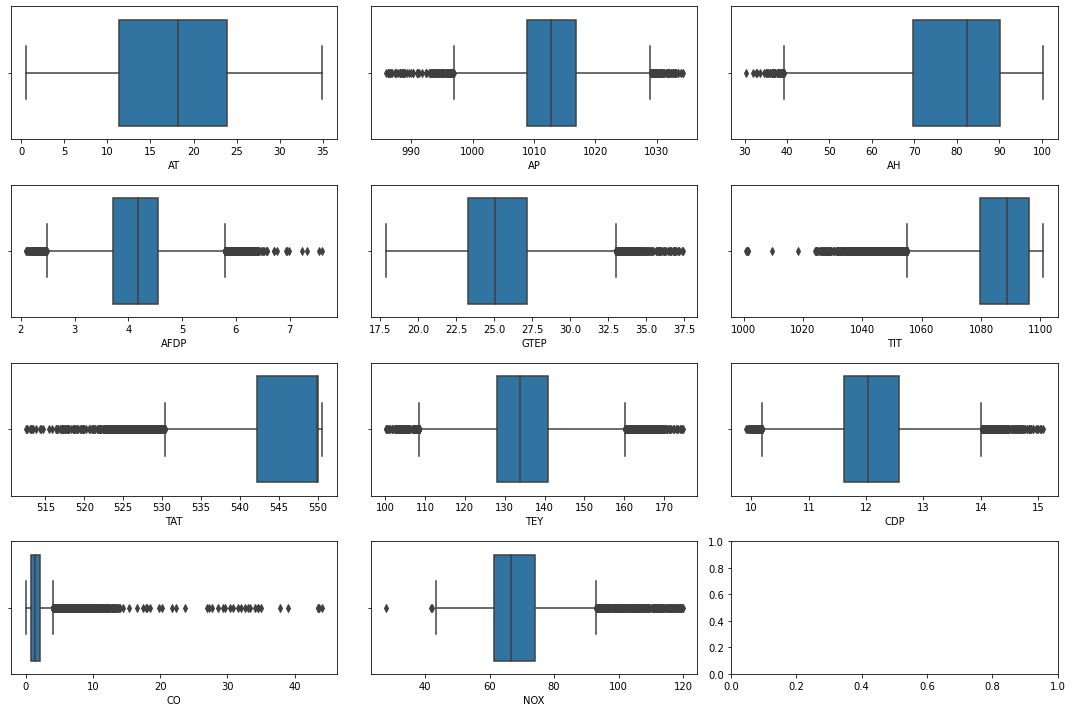

In [10]:
# Check the outliers

fig, ax = plt.subplots(4,3, figsize = (15,10))

sns.boxplot(data.AT, ax = ax[0,0])
sns.boxplot(data.AP, ax = ax[0,1])
sns.boxplot(data.AH, ax = ax[0,2])
sns.boxplot(data.AFDP, ax = ax[1,0])
sns.boxplot(data.GTEP, ax = ax[1,1])
sns.boxplot(data.TIT, ax = ax[1,2])
sns.boxplot(data.TAT, ax = ax[2,0])
sns.boxplot(data.TEY, ax = ax[2,1])
sns.boxplot(data.CDP, ax = ax[2,2])
sns.boxplot(data.CO, ax = ax[3,0])
sns.boxplot(data.NOX, ax = ax[3,1])

plt.tight_layout()
plt.show()

In [11]:
scale=MinMaxScaler()
df1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


### 2.Extracting independent and dependent variables

In [12]:

X = df1.drop(axis =0, columns ='TEY').values
Y = df1['TEY'].values

In [13]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [14]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [15]:
keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None)
keras.metrics.MeanSquaredError()

In [16]:
# Setting certain fix value of random seed for reproductibility
seed = 7
np.random.seed(seed)

### 3. Model building

#### 3.1 Create the model

In [19]:

model = Sequential()
model.add(Dense(12, input_dim =10, kernel_initializer = 'uniform', activation ='relu'))
model.add(Dense(8, kernel_initializer ='uniform', activation ='relu'))
model.add(Dense(1, kernel_initializer ='uniform', activation ='relu'))  # This last layer should be changed to 'relu' as sigmoid is used for classification problems.


#### 3.2 Compile the model

In [20]:
model.compile(loss = 'mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError()])  # # metrics= ['accuracy'] changed to [keras.metrics.MeanSquaredError()] as the Y variable is continuous datatype.

#### 3.3 Fit the model

In [21]:
history = model.fit(X,Y, validation_split=0.33, epochs =100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 7s 5ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 2.4163e-04 - val_mean_squared_error: 2.4163e-04
Epoch 2/100
1008/1008 [==============================] - 5s 5ms/step - loss: 2.4557e-04 - mean_squared_error: 2.4557e-04 - val_loss: 1.6783e-04 - val_mean_squared_error: 1.6783e-04
Epoch 3/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.6342e-04 - mean_squared_error: 1.6342e-04 - val_loss: 1.5090e-04 - val_mean_squared_error: 1.5090e-04
Epoch 4/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.5012e-04 - mean_squared_error: 1.5012e-04 - val_loss: 1.3527e-04 - val_mean_squared_error: 1.3527e-04
Epoch 5/100
1008/1008 [==============================] - 5s 5ms/step - loss: 1.4029e-04 - mean_squared_error: 1.4029e-04 - val_loss: 1.3261e-04 - val_mean_squared_error: 1.3261e-04
Epoch 6/100
1008/1008 [==============================] - 5s 5ms/step - loss: 1.3712e-04 - mean_squared_

1008/1008 [==============================] - 4s 4ms/step - loss: 1.1544e-04 - mean_squared_error: 1.1544e-04 - val_loss: 1.3080e-04 - val_mean_squared_error: 1.3080e-04
Epoch 47/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.1877e-04 - mean_squared_error: 1.1877e-04 - val_loss: 1.0705e-04 - val_mean_squared_error: 1.0705e-04
Epoch 48/100
1008/1008 [==============================] - 5s 5ms/step - loss: 1.1385e-04 - mean_squared_error: 1.1385e-04 - val_loss: 1.5089e-04 - val_mean_squared_error: 1.5089e-04
Epoch 49/100
1008/1008 [==============================] - 5s 5ms/step - loss: 1.1611e-04 - mean_squared_error: 1.1611e-04 - val_loss: 9.9120e-05 - val_mean_squared_error: 9.9120e-05
Epoch 50/100
1008/1008 [==============================] - 5s 5ms/step - loss: 1.1224e-04 - mean_squared_error: 1.1224e-04 - val_loss: 1.0103e-04 - val_mean_squared_error: 1.0103e-04
Epoch 51/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.1406e-04 - mean_squared

1008/1008 [==============================] - 5s 5ms/step - loss: 1.0840e-04 - mean_squared_error: 1.0840e-04 - val_loss: 1.3429e-04 - val_mean_squared_error: 1.3429e-04
Epoch 92/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.0867e-04 - mean_squared_error: 1.0867e-04 - val_loss: 1.0260e-04 - val_mean_squared_error: 1.0260e-04
Epoch 93/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.1158e-04 - mean_squared_error: 1.1158e-04 - val_loss: 9.7270e-05 - val_mean_squared_error: 9.7270e-05
Epoch 94/100
1008/1008 [==============================] - 6s 5ms/step - loss: 1.0653e-04 - mean_squared_error: 1.0653e-04 - val_loss: 9.8466e-05 - val_mean_squared_error: 9.8466e-05
Epoch 95/100
1008/1008 [==============================] - 5s 5ms/step - loss: 1.0748e-04 - mean_squared_error: 1.0748e-04 - val_loss: 1.3697e-04 - val_mean_squared_error: 1.3697e-04
Epoch 96/100
1008/1008 [==============================] - 5s 5ms/step - loss: 1.0782e-04 - mean_squared

#### 3.4 Evaluate the model

In [22]:
scores = model.evaluate(X,Y)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 9.7984e-05 - mean_squared_error: 9.7984e-05
mean_squared_error: 0.01%


### 4. Tuning of Hyperparameter -->  Batch size and epochs

In [25]:
# Create model

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim= 10, kernel_initializer= 'uniform', activation= 'relu'))
    model.add(Dense(8, kernel_initializer= 'uniform', activation= 'relu'))
    model.add(Dense(1, kernel_initializer= 'uniform', activation='relu'))  # This last layer should be changed to 'relu' as sigmoid is used for classification problems.
    
    adam = Adam(lr =0.01)
    
    model.compile(loss= 'mse', optimizer= adam, metrics= [keras.metrics.MeanSquaredError()])  # metrics= ['accuracy'] changed to [keras.metrics.MeanSquaredError()] as the Y variable is continuous datatype.
    return model

In [28]:
# Create the model
model= KerasRegressor(build_fn = create_model, verbose = 0)   # the Y variable is a continuous data type where you've to apply the keras regressor model to it

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dicitionary of the grid search parameters
param_grid = dict(batch_size = batch_size, epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.291 total time=  36.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  39.6s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.317 total time=  39.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  39.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  39.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, 

In [29]:
# Summarize the results

print('Best :{}, using {}'. format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with:{}'. format(mean, stdev, param))

Best :-0.00016972345183603467, using {'batch_size': 40, 'epochs': 50}
-0.12166755037615076,0.14889059076469816 with:{'batch_size': 10, 'epochs': 10}
-0.058252452273154634,0.11625270931913145 with:{'batch_size': 10, 'epochs': 50}
-0.044477277087571564,0.08846842246298527 with:{'batch_size': 10, 'epochs': 100}
-0.00021172182314330713,7.99714085898622e-05 with:{'batch_size': 20, 'epochs': 10}
-0.09377177225978812,0.12014110789811996 with:{'batch_size': 20, 'epochs': 50}
-0.14322058152174577,0.12519999525167044 with:{'batch_size': 20, 'epochs': 100}
-0.00017221661983057857,2.661898904301438e-05 with:{'batch_size': 40, 'epochs': 10}
-0.00016972345183603467,0.00012745538304559487 with:{'batch_size': 40, 'epochs': 50}
-0.05280520381056704,0.10541399600006886 with:{'batch_size': 40, 'epochs': 100}
